# England or Brazil: Really Simple Classification Example

In this workbook we will take our unplugged exercise and plug it in!  In the England or Brazil exercise we used our human brains to try to work out how to classify data samples from World Cups as either England or Brazil.  The samples contained the total goals scored in the tournament and the average attendance at games.  The data set was extremely small, so whilst it was handy to use as an example for manually classisfying samples, it's not the best for machine learning, where larger data sets would be better.  Nevertheless, it is useful to see how this same data set that we worked on manually could be processed by Python Machine Learning.

First load the libraries we need.  For this course we will use this library, which combines the components we need from Numpy, Pandas, Matplotlib and Scikit Learn an wraps then in a simplified class called a DasiFrame.  DasiFrame is essentially a Pandas DataFrame extended with machine learning capabilities.

In [1]:
from dasi_library import *

## Load the data from the CSV file

Load our data set containing data from World Cups from 1950 to 1970.

In [2]:
dataset = readCsv('England or Brazil.csv')

## Inspect the data

First we will poke around the data to see what we can find.  
The aim is to understand the data a bit more whilst wearing our machine learning hat.  We want to understand the features and identify which features might be useful for us when training our model.

### Identify the number of features (columns) and samples (rows)
Understand the size of the data

In [3]:
dataset.shape

(12, 3)

### Have a quick look at the data
Take a quick look at the data to understand what you are dealing with.

In [4]:
dataset.head(10)

,Goals scored,Avg attendance,Country
0,14,34518.50000,Brazil
1,4,47513.00000,England
2,2,38105.33333,England
3,22,121936.33330,Brazil
4,11,93331.50000,England
5,5,10292.00000,England
6,19,63908.33333,Brazil
7,16,35395.16667,Brazil
8,4,32324.25000,England
9,8,26035.66667,Brazil


### Calculate descriptive stats
These give an idea of the range and spread of values for each feature.

In [5]:
dataset.describe()

,Goals scored,Avg attendance
count,12.000000,12.000000
mean,9.750000,48687.618053
std,6.621247,31271.959459
min,2.000000,10292.000000
25%,4.000000,31368.187500
50%,8.000000,36750.250000
75%,14.500000,55270.583330
max,22.000000,121936.333300


## Visualise the data
We can gain a better understanding of the data using some visualisations.  

### Box plots
Box plots give an idea of spread:

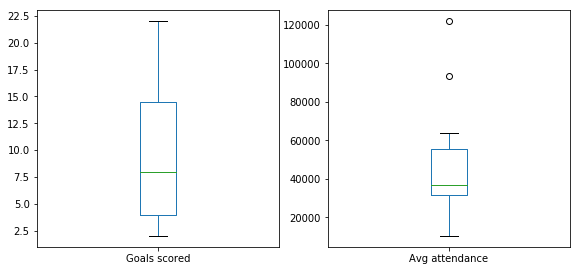

In [6]:
boxPlotAll(dataset)

### Histograms
Histograms give an idea of distribution:

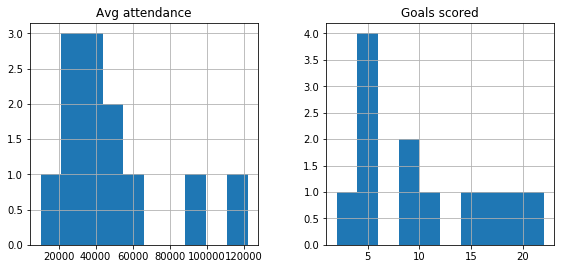

In [7]:
histPlotAll(dataset)

## Now let's plot some comparative histograms
This will help us see how features behave for the two classes.

Comparative histograms for ['Brazil' 'England']


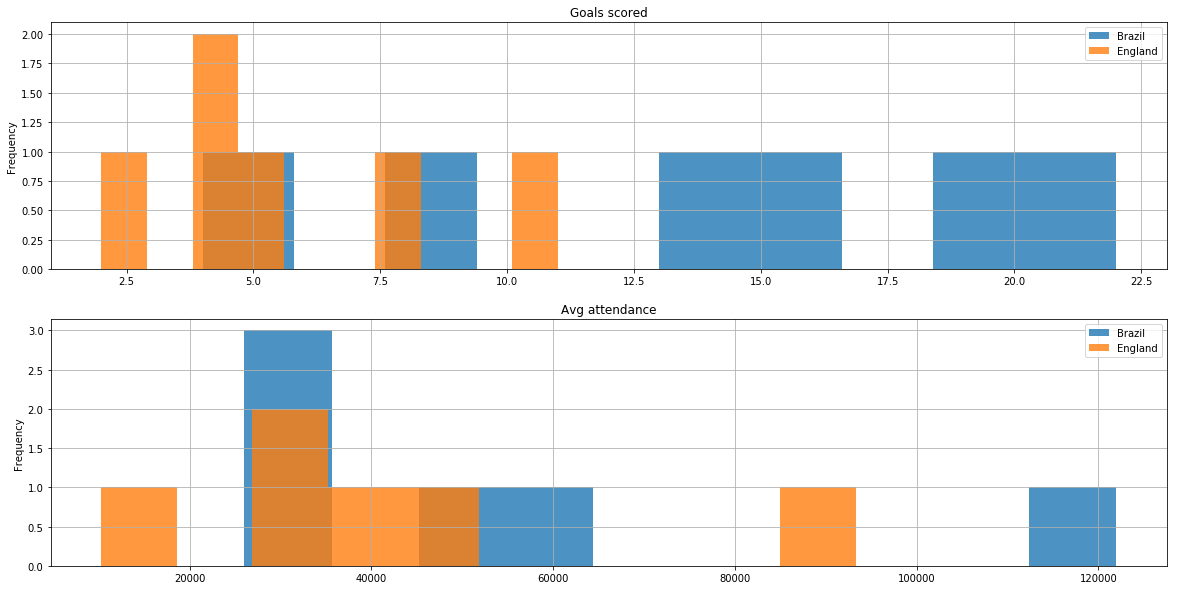

In [8]:
classComparePlot(dataset,'Country', plotType='hist')

## Split the data into target feature and input features
Our aim is to use the input features to predict the target feature.


### Select our target feature

For a classification task, the target feature is a feature with 2 or more unique values that we are trying to predict.  Here it is the country, England or Brazil.

### Split out the target feature

By convention, Y is the set of target values for the samples.  These are the values we hope our model will be able to predict. By convention, X is the set of input samples.  These are the values we will use to create a model.

In [9]:
X,Y = splitXY(dataset, 'Country')

In [10]:
X

,Goals scored,Avg attendance
0,14,34518.50000
1,4,47513.00000
2,2,38105.33333
3,22,121936.33330
4,11,93331.50000
5,5,10292.00000
6,19,63908.33333
7,16,35395.16667
8,4,32324.25000
9,8,26035.66667


In [11]:
Y

0      Brazil
1     England
2     England
3      Brazil
4     England
5     England
6      Brazil
7      Brazil
8     England
9      Brazil
10     Brazil
11    England
Name: Country, dtype: object

## Split the data set into training and test sets
We will train the model on the training set and test it using the test set.

We will use 67% of the data for training and 33% for testing.


The seed parameter starts off the random number generator at a given point.  Using the same seed will generate the same random split.  This is useful if we want to repeat the exact same experiment, say to compare different algorithms.  


<hr/>

**You choose >>**

**Go ahead and change to seed number to another integer.**

<hr/>

In [12]:
test_size = 0.33
seed = 1
X_train, X_test, Y_train, Y_test = trainTestSplit(X, Y, test_size=test_size, random_state=seed)

In [13]:
X_train

,Goals scored,Avg attendance
1,4,47513.00000
6,19,63908.33333
0,14,34518.50000
7,16,35395.16667
11,8,28500.00000
9,8,26035.66667
8,4,32324.25000
5,5,10292.00000


In [14]:
X_test

,Goals scored,Avg attendance
2,2,38105.33333
3,22,121936.33330
4,11,93331.50000
10,4,52391.33333


In [15]:
Y_train

array(['England', 'Brazil', 'Brazil', 'Brazil', 'England', 'Brazil',
       'England', 'England'], dtype=object)

In [16]:
Y_test

array(['England', 'Brazil', 'England', 'Brazil'], dtype=object)

## Train the model
Use the training data to devise a model that can perform our predictions.

We will use the decisions tree algorithm to train our model.

In [17]:
model = modelFit(X_train, Y_train, DecisionTreeClassifier)

Let's see how the model performs on the *training data*:

In [18]:
# Make predictions based on the training data
predictions = predict(model, X_test)

# Compare the results of the model with the known answers.
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

0.75
[[1 1]
 [0 2]]


## Test the model

Now use the model to make predictions on data that was not used for training (i.e. the *test data*).

In [19]:
predictions = predict(model, X_test)

## Check how well we did

Compare the results of the model with the known answers.

In [21]:
print(accuracy_score(Y_test, predictions))
print(confusion_matrix(Y_test, predictions))

0.75
[[1 1]
 [0 2]]


In [ ]:
comparePredictionsWithOriginals(X_train, predictions, Y_train)

In [ ]:
predictions

## Apply the model
Use data that we have not yet seen to try to make real predictions.

Load the unseen data.  This contains data from World Cups from 1974 onwards.

In [22]:
unseen_data = readCsv('England or Brazil Unseen.csv')
unseen_data

,Goals scored,Avg attendance,Country
0,5,24763,Brazil
1,1,21000,Brazil
2,14,19723,Brazil
3,22,121936,Brazil
4,8,26036,Brazil
5,16,35395,Brazil
6,14,34519,Brazil
7,4,52391,Brazil
8,19,63908,Brazil
9,6,55752,Brazil


Split into target feature and input features.

In [23]:
X,Y = splitXY(unseen_data, 'Country')

Use our model to make predictions.

In [24]:
predictions = predict(model, X)

Compare our results with what we know actually happened from 1974 onwards.

In [25]:
comparePredictionsWithOriginals(X, predictions, Y)

,Goals scored,Avg attendance,Prediction,Original
0,5,24763,England,Brazil
1,1,21000,England,Brazil
2,14,19723,Brazil,Brazil
3,22,121936,Brazil,Brazil
4,8,26036,Brazil,Brazil
5,16,35395,Brazil,Brazil
6,14,34519,Brazil,Brazil
7,4,52391,England,Brazil
8,19,63908,Brazil,Brazil
9,6,55752,England,Brazil


Calculate how accurate our predictions were.

In [26]:
print(accuracy_score(Y, predictions))
print(confusion_matrix(Y, predictions))

0.75
[[10 10]
 [ 0 20]]


## Summary
So our model works.  It's not brilliant, but that's mainly because the data set is extremely small, so the statisical algorithms don't have much to work on.  But hopefully you now have a better sense of how the machine learning process works.

## Visualising the Decision Tree

Just like with our paper-based exercises, we can interrogate the machine learning algorithm to draw a visualisation of the decision tree.

To run this code you need to first install graphviz:

<code>pip install graphviz</code>

On Linux also install the following:

<code>sudo apt-get install graphviz</code>


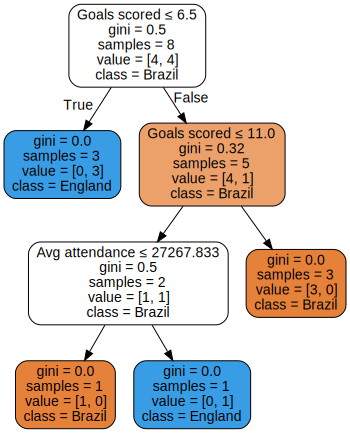

In [27]:
viewDecisionTree(model, X.columns)

The numbers are as follows:
- Gini is a measure of the impurity of the labelling.
- value tells us how many observations fell into each predicted category (England or Brazil)

<hr/>

**Question: >>**

**How does this decision tree compare with the ones you came up with?  Has the computer done a good job in modelling the underlying relations in the data?**

<hr/>